Nama : Rika Ajeng Finatih

NIM : 121450036

Kelas : Pengenalan Pola RA

# **Speech Recongnition**

Speech Recognition atau pengenalan ucapan adalah teknologi yang memungkinkan komputer atau perangkat untuk mengenali dan memahami ucapan manusia dalam bentuk suara. Tujuannya adalah untuk mengubah suara yang diucapkan menjadi teks atau tindakan yang diinginkan, sehingga mesin dapat merespons atau berinteraksi dengan pengguna melalui bahasa alami.

## **1. Istilah Dasar Audio dalam Bentuk Digital**

### **a. Frequency (Hz)**


*   Menggambarkan kecepatan getaran suara dalam satu detik. Frekuensi tinggi memiliki suara yang lebih tinggi (lebih "nyaring"), dan frekuensi rendah memiliki suara yang lebih rendah (lebih "berat").
*   Pada grafik frekuensi, kita dapat melihat perbedaan nada berdasarkan jarak antar gelombang.

<img src="https://uploads-cdn.omnicalculator.com/images/britannica-wave-frequency.jpg" width="400"/>

### b. **Intensitas (dB)**
* Menunjukkan tingkat kerasnya suara, yang diwakili oleh amplitudo gelombang suara. Semakin tinggi amplitudo, semakin keras suara tersebut.
* Grafik amplitudo memberikan gambaran ketinggian dan kedalaman suara pada berbagai titik.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124722804500162-f13-15-9780124722804.gif" width="400"/>

### **c. Sample Rate**

* Menentukan berapa kali per detik sinyal audio diambil atau direkam dalam bentuk data. Contohnya, pada sample rate 44.1 kHz, suara di-sample 44,100 kali per detik.
* Sample rate yang lebih tinggi menghasilkan kualitas suara yang lebih baik, tetapi membutuhkan lebih banyak penyimpanan.



## **2. Library yang Digunakan**
Untuk analisis dan visualisasi data audio, beberapa library digunakan di sini:



*   **pandas:** Digunakan untuk pengolahan dan manipulasi data.
*   **numpy:** Digunakan untuk operasi numerik.
*   **matplotlib & seaborn:** Untuk visualisasi data.
*   **Librosa:** Library utama untuk memproses sinyal audio.
*   **IPython.display:** Untuk memutar file audio dalam format notebook.



In [65]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from glob import glob

## **3. Memuat dan Membaca File Audio**

Berbagai format file audio seperti `mp3`, `wav`, `m4a`, `flac`, dan `ogg` dapat diproses dengan Librosa. Contoh kode berikut memuat file wav untuk analisis lebih lanjut.

In [66]:
audio_files = glob('/content/harvard.wav')
ipd.Audio(audio_files[0])

* `ipd.Audio()`: Menggunakan IPython untuk memutar file audio secara langsung dalam notebook.



Kemudian, dengan menggunakan `librosa.load()`, file audio tersebut dibaca dan dikonversi menjadi representasi numerik yang dapat digunakan.

In [67]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 5.5331143e-06 -1.1380684e-05 -7.8519388e-06 -1.0879130e-06
  2.7607541e-06 -1.8428616e-06 -1.7447881e-05  3.3382303e-06
 -2.3906834e-06  4.7032186e-06]
shape y: (404754,)
sr: 22050




* **Output**: `y` adalah array 1D yang berisi data sinyal suara, dan `sr` adalah sample rate-nya.



Selanjutnya, hasil sinyal mentah ini dapat divisualisasikan menggunakan `pandas.Series.plot`:

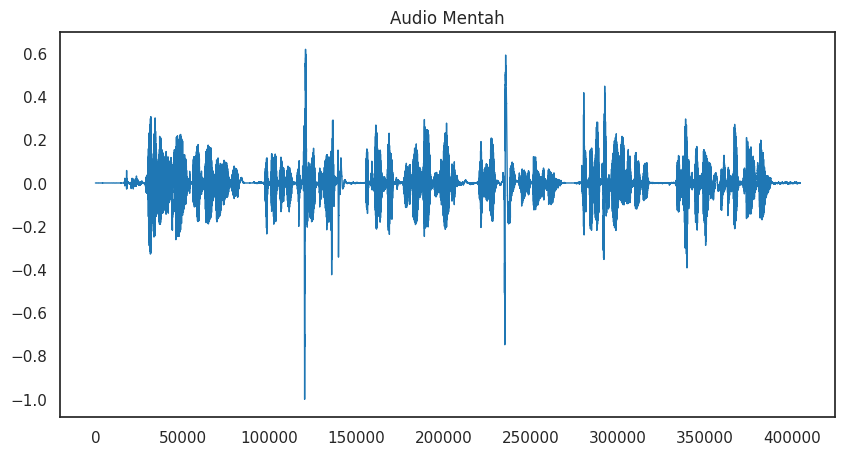

In [68]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title='Audio Mentah', color=color_pal[0])
plt.show()

Dalam grafik ini, terdapat keheningan di awal yang ditunjukkan oleh amplitudo yang sangat kecil. Setelahnya, terlihat gelombang dengan amplitudo lebih besar, yang menandakan awal dari suara atau ucapan dalam audio. Beberapa puncak amplitudo sangat tinggi dan rendah mengindikasikan adanya suara keras atau bunyi tertentu yang lebih menonjol pada bagian-bagian tertentu dari audio. Beberapa segmen pada sinyal terlihat lebih padat (dengan lebih banyak gelombang) dibandingkan bagian lain, yang kemungkinan besar menunjukkan audio dengan suara yang lebih kompleks atau lebih cepat. Selain itu, ada beberapa puncak yang sangat ekstrem di grafik, yang mungkin disebabkan oleh noise atau suara keras mendadak, yang bukan merupakan bagian dari suara asli.

## **4. Pemrosesan Audio – Menghapus Keheningan**

Bagian ini menghilangkan bagian sunyi (keheningan) di awal dan akhir audio menggunakan `librosa.effects.trim()`.

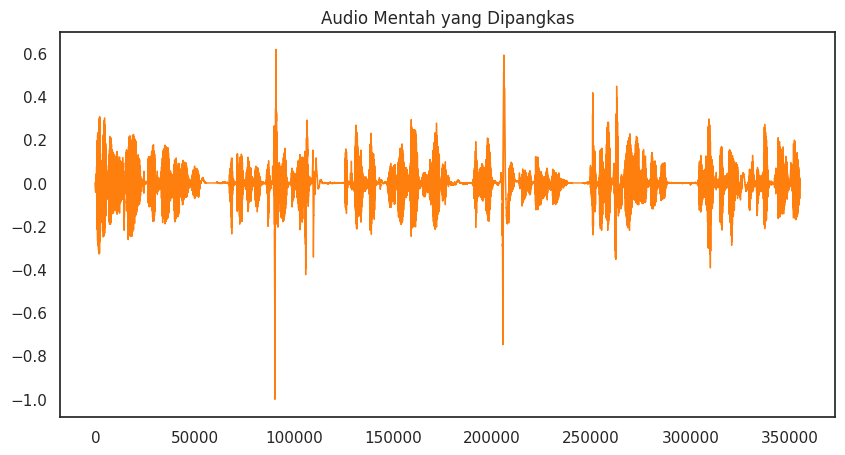

In [69]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Audio Mentah yang Dipangkas', color=color_pal[1])
plt.show()

In [74]:
# Audio hasil pemangkasan
ipd.Audio(y_trimmed, rate=sr)



*   **Input:** `y` (array data audio), `top_db` (mengatur batas atas dB untuk keheningan).
*   **Output:** `y_trimmed`, sinyal audio yang telah dipotong keheningannya.



Grafik ini menunjukkan sinyal audio mentah yang telah dipangkas bagian keheningannya di awal dan akhir, yang berarti hanya bagian suara yang aktif dan relevan yang ditampilkan. Pemangkasan ini dilakukan untuk menghilangkan bagian sinyal dengan amplitudo yang sangat rendah atau mendekati nol, yang biasanya merepresentasikan keheningan sebelum atau sesudah suara utama.

Pada grafik ini, sumbu X masih menunjukkan jumlah sampel yang berkaitan dengan durasi suara, sedangkan sumbu Y menunjukkan amplitudo atau intensitas sinyal. Setelah pemangkasan, sinyal terlihat dimulai lebih awal dibandingkan grafik sebelumnya, dengan segera memasuki bagian audio yang aktif. Bagian keheningan atau jeda yang panjang di awal dan akhir tidak lagi terlihat, membuat grafik lebih padat pada bagian suara aktif.

Gelombang amplitudo dalam grafik ini tampak lebih konsisten dan padat, memperlihatkan pola suara yang lebih berkesinambungan. Beberapa puncak amplitudo yang sangat tinggi tetap ada, menunjukkan adanya bunyi keras atau puncak suara pada bagian tertentu dari audio. Secara keseluruhan, grafik ini menunjukkan dinamika sinyal audio yang lebih ringkas dan fokus, berkat pemangkasan keheningan yang menyisakan hanya bagian penting dari suara atau ucapan dalam file audio.

## **5. Spektogram – Representasi Waktu-Frekuensi**

Spektogram adalah representasi visual dari intensitas sinyal audio dalam domain waktu dan frekuensi. Di sini, digunakan **Short-Time Fourier Transform (STFT)** untuk mengubah sinyal audio dari domain waktu ke domain frekuensi.

In [70]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)



 `librosa.stft()`: Menghasilkan transformasi Fourier dari sinyal.

* **Input:** Array sinyal.
* **Output:** Matriks kompleks yang merepresentasikan spektrum sinyal pada waktu tertentu.

`librosa.amplitude_to_db()`: Mengubah amplitudo menjadi skala dB, yang lebih cocok untuk representasi visual.





Kemudian spektogram ini divisualisasikan sebagai berikut:

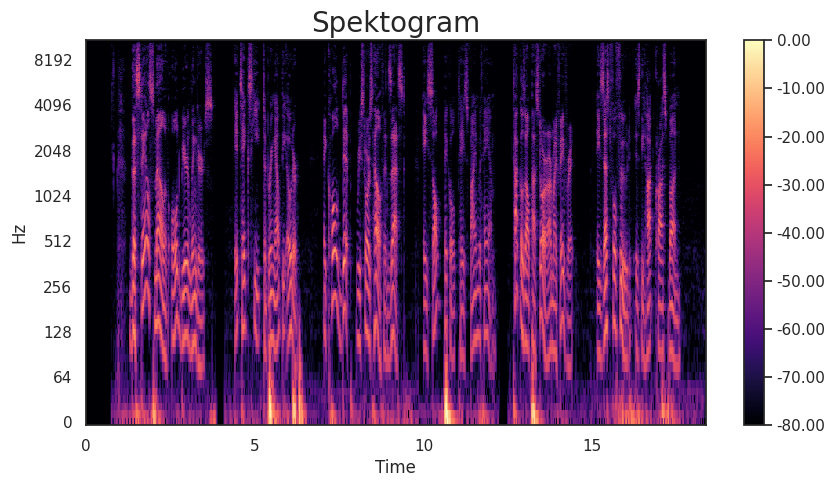

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spektogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

Spektogram menunjukkan intensitas frekuensi dalam waktu, memberikan gambaran visual dari variasi intensitas dalam sinyal suara.

## **6. Mel Spectrogram – Representasi Frekuensi Mel**

Spektogram Mel adalah versi spektogram yang diubah ke dalam **skala Mel**, yaitu skala logaritmik yang lebih sesuai dengan persepsi pendengaran manusia. Librosa memiliki fungsi untuk menghitung Mel Spectrogram:

In [72]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

`librosa.feature.melspectrogram()`: Menghitung spektogram pada skala Mel.
*   **Input**: `y` (sinyal audio), `sr` (sample rate), `n_mels` (jumlah filter Mel).
*   **Output:** Matriks intensitas pada skala Mel.

Visualisasi Mel Spectrogram:

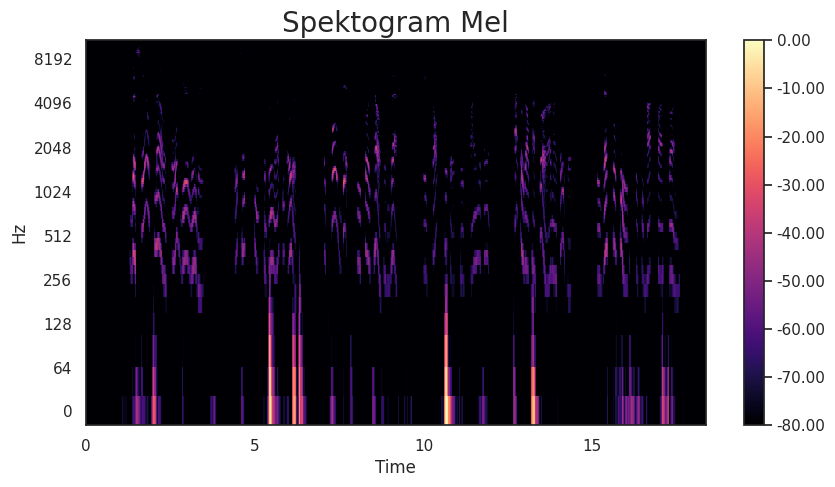

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spektogram Mel', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()


Mel Spectrogram memberikan gambaran intensitas dalam frekuensi Mel yang logaritmik, memungkinkan kita melihat bagaimana intensitas suara berubah di sepanjang waktu dalam cara yang lebih relevan bagi persepsi manusia.



# **Referensi:**
1. [Example Audio](https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition?resource=download)
2. [Speech Recongnition with python](https://www.kaggle.com/code/robikscube/working-with-audio-in-python)
